# TIME SERIES KAGGLE 

## Import libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
from pickle import dump

## Import data

In [3]:
total_data = pd.read_csv("/workspaces/kaggle_proyect/data/raw/Aquifer_Auser.csv")

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [5]:
total_data.columns

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

In [6]:
total_data.head(5)

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
count_duplicates = total_data.duplicated().sum()
count_duplicates

0

In [8]:
total_data['Date'] = pd.to_datetime(total_data['Date'], format='%d/%m/%Y')

In [9]:
columns_numeric = total_data.select_dtypes(exclude=['datetime64[ns]']).columns

# Calcular la mediana de las columnas que no son de tipo fecha
medianas = total_data[columns_numeric].median()

# Imputar los valores nulos con las medianas respectivas
total_data[columns_numeric] = total_data[columns_numeric].fillna(medianas)

In [10]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     8154 non-null   datetime64[ns]
 1   Rainfall_Gallicano                       8154 non-null   float64       
 2   Rainfall_Pontetetto                      8154 non-null   float64       
 3   Rainfall_Monte_Serra                     8154 non-null   float64       
 4   Rainfall_Orentano                        8154 non-null   float64       
 5   Rainfall_Borgo_a_Mozzano                 8154 non-null   float64       
 6   Rainfall_Piaggione                       8154 non-null   float64       
 7   Rainfall_Calavorno                       8154 non-null   float64       
 8   Rainfall_Croce_Arcana                    8154 non-null   float64       
 9   Rainfall_Tereglio_Coreglia_Antelminelli  

In [11]:
columns_numeric

Index(['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
       'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
       'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

In [12]:
rainfall_columns = ['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
                    'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
                    'Rainfall_Calavorno', 'Rainfall_Croce_Arcana', 'Rainfall_Tereglio_Coreglia_Antelminelli',
                    'Rainfall_Fabbriche_di_Vallico']
total_data['Rainfall'] = total_data[rainfall_columns].sum(axis=1)

depth_columns = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
                 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']
total_data['Depth_to_Groundwater'] = total_data[depth_columns].sum(axis=1)

temperature_columns = ['Temperature_Orentano', 'Temperature_Monte_Serra', 'Temperature_Ponte_a_Moriano',
                       'Temperature_Lucca_Orto_Botanico']
total_data['Temperature'] = total_data[temperature_columns].sum(axis=1)


volume_columns = ['Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL']
total_data['Volume'] = total_data[volume_columns].sum(axis=1)


hydrometry_columns = ['Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']
total_data['Hydrometry'] = total_data[hydrometry_columns].sum(axis=1)


In [13]:
total_data.drop(columns=columns_numeric, inplace=True)
total_data

,Date,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
0,1998-03-05,0.0,-31.00,0.00,-38257.851429,-0.02
1,1998-03-06,0.0,-31.00,10.05,-38257.851429,-0.02
2,1998-03-07,0.0,-31.00,19.20,-38257.851429,-0.02
3,1998-03-08,0.0,-31.00,25.25,-38257.851429,-0.02
4,1998-03-09,0.0,-31.00,24.25,-38257.851429,-0.02
...,...,...,...,...,...,...
8149,2020-06-26,0.0,-18.23,67.70,-33494.139866,-0.83
8150,2020-06-27,0.0,-29.51,69.25,-33494.139866,-0.82
8151,2020-06-28,0.0,-29.57,70.30,-31819.432874,-0.80
8152,2020-06-29,0.0,-29.58,64.90,-33494.139866,-0.79


In [14]:
total_data.set_index('Date', inplace=True)
total_data.head(5)

,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
Date,,,,,
1998-03-05,0.0,-31.0,0.00,-38257.851429,-0.02
1998-03-06,0.0,-31.0,10.05,-38257.851429,-0.02
1998-03-07,0.0,-31.0,19.20,-38257.851429,-0.02
1998-03-08,0.0,-31.0,25.25,-38257.851429,-0.02
1998-03-09,0.0,-31.0,24.25,-38257.851429,-0.02


In [15]:
new_columns = total_data.columns
new_columns

Index(['Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Volume',
       'Hydrometry'],
      dtype='object')

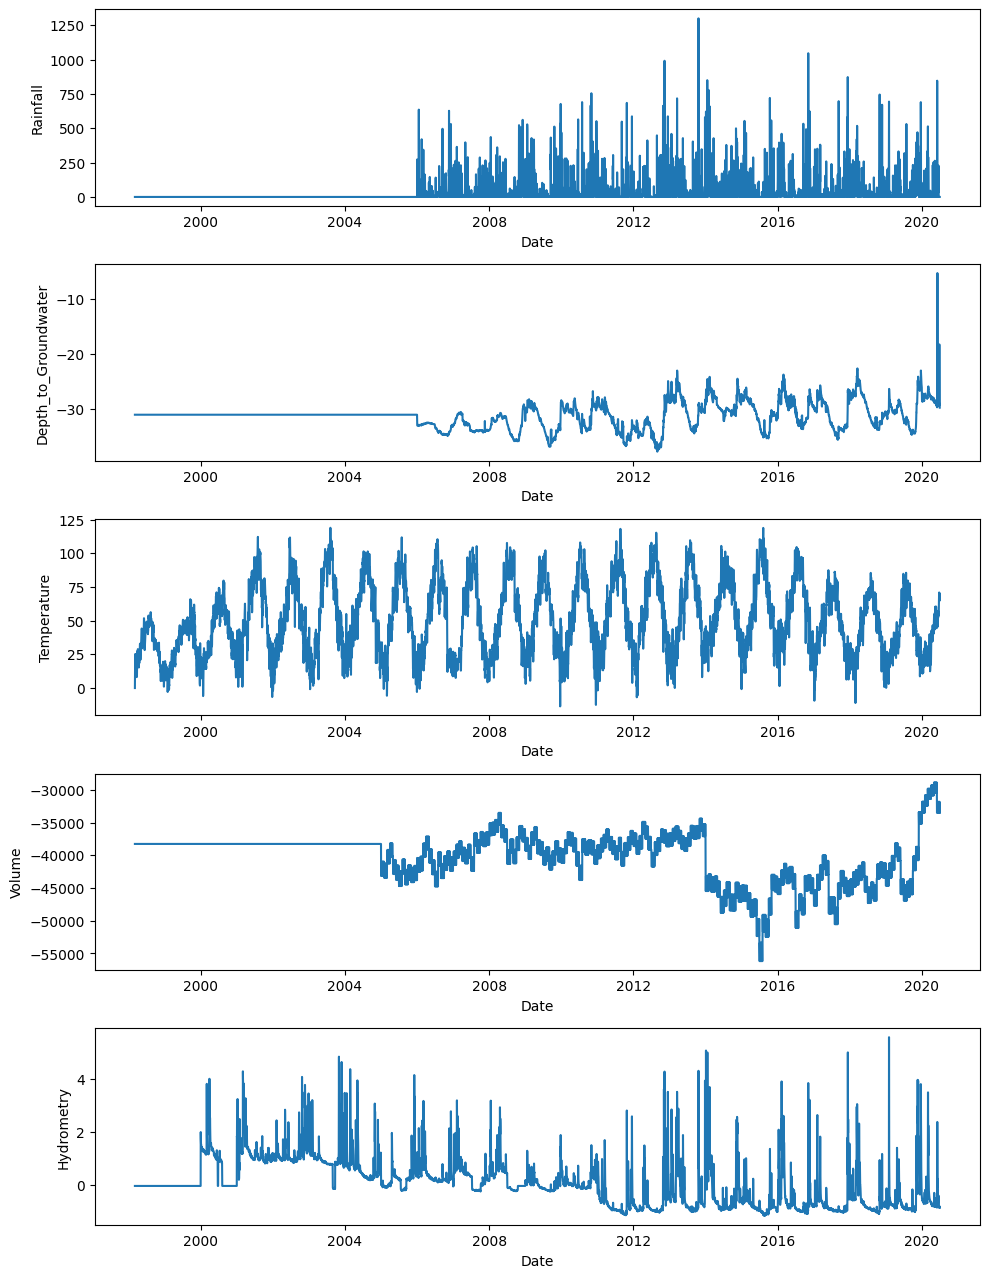

In [16]:
fig, axis = plt.subplots(6, 1, figsize = (10, 15))

sns.lineplot(ax = axis[0], data = total_data[new_columns[0]])
sns.lineplot(ax = axis[1], data = total_data[new_columns[1]])
sns.lineplot(ax = axis[2], data = total_data[new_columns[2]])
sns.lineplot(ax = axis[3], data = total_data[new_columns[3]])
sns.lineplot(ax = axis[4], data = total_data[new_columns[4]])

plt.delaxes(ax = axis[5])
plt.tight_layout()

plt.show()

## Decomposition of the serie

In [17]:
decomposition_dict = {}

for column in new_columns:
    decomposition = seasonal_decompose(total_data[column], period=12)
    decomposition_dict[f'decomposition_{column}'] = decomposition


In [18]:
decomposition_dict

{'decomposition_Rainfall': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f01ad5070d0>,
 'decomposition_Depth_to_Groundwater': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f01ae2ae150>,
 'decomposition_Temperature': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f01ac4b3290>,
 'decomposition_Volume': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f01ac4a5710>,
 'decomposition_Hydrometry': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f01ac4fcb90>}

## Trend analysis

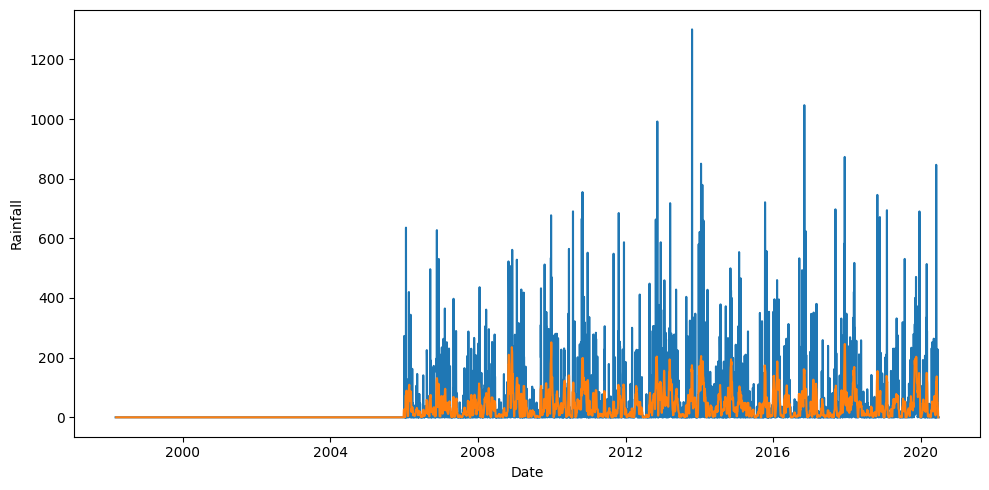

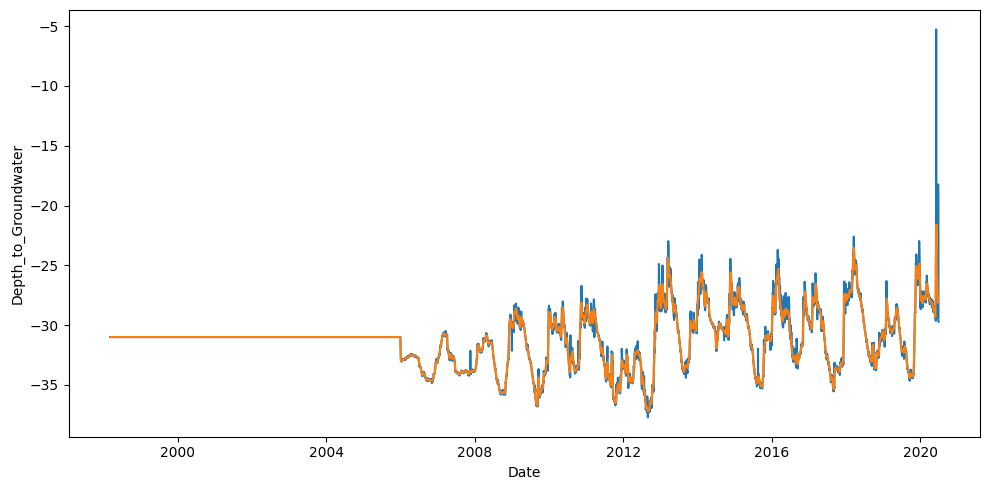

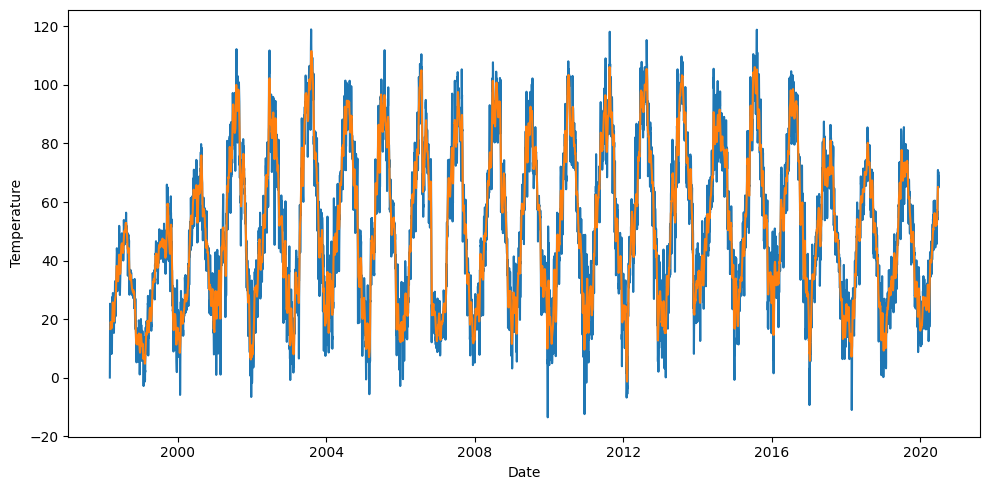

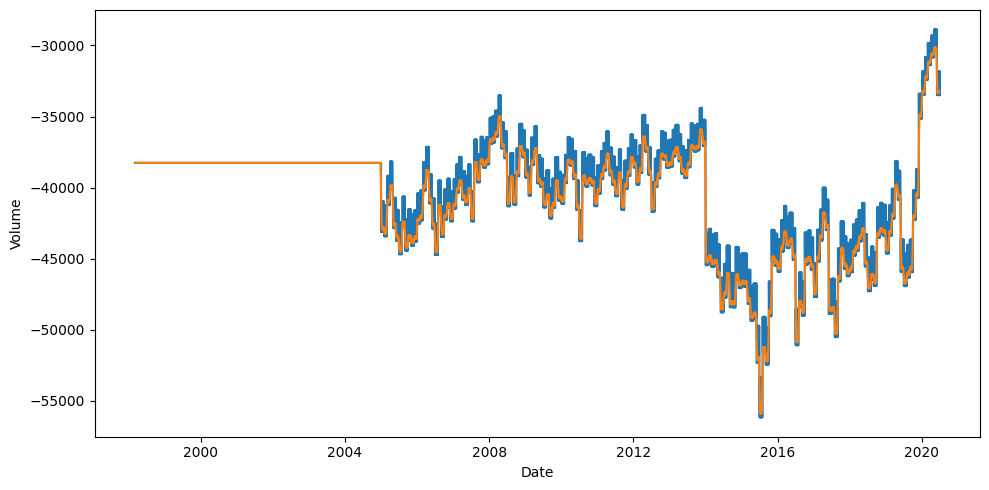

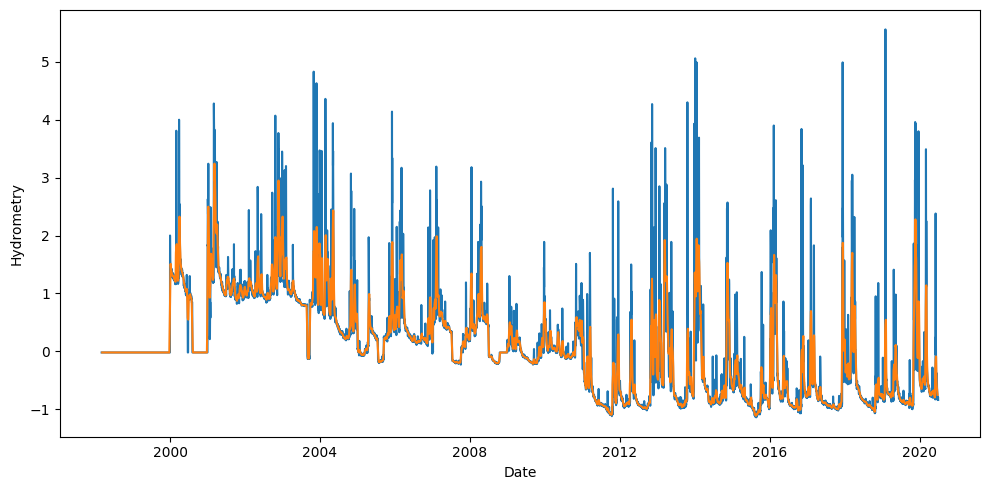

In [19]:
for column in new_columns:
    trend = decomposition_dict[f'decomposition_{column}'].trend

    fig, axis = plt.subplots(figsize = (10, 5))

    sns.lineplot(data = total_data[column])
    sns.lineplot(data = trend)

    plt.tight_layout()

    plt.show()

## Seasonality analysis

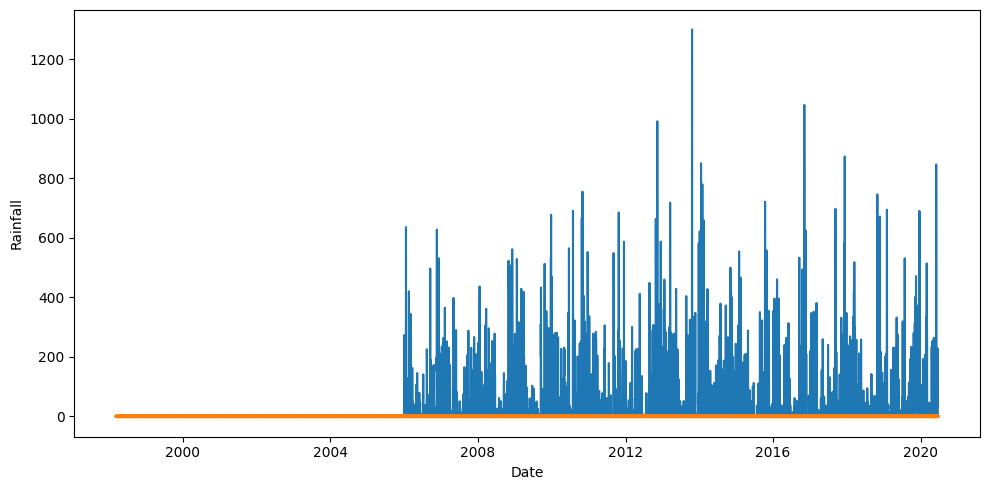

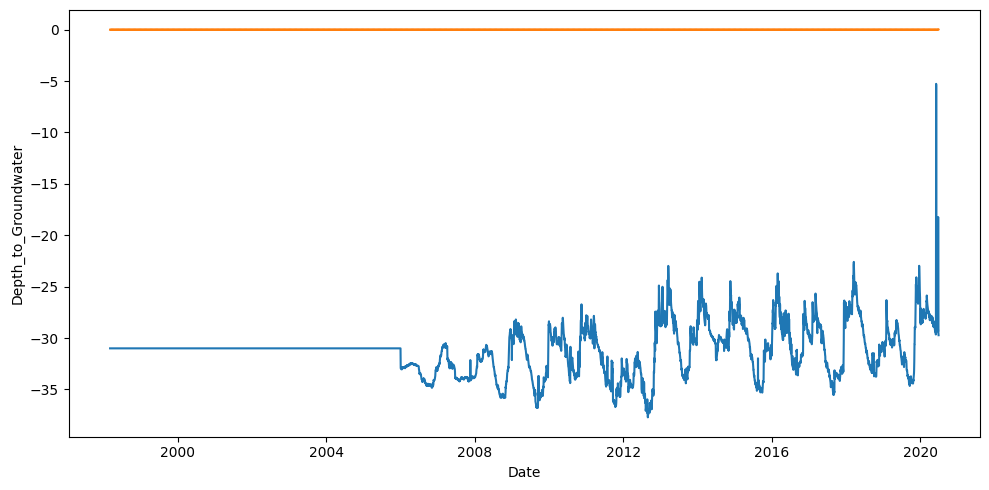

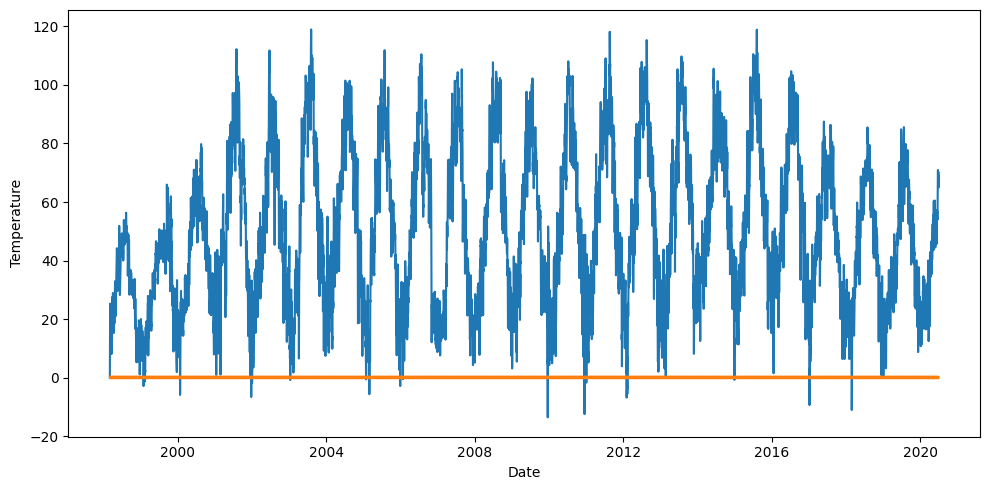

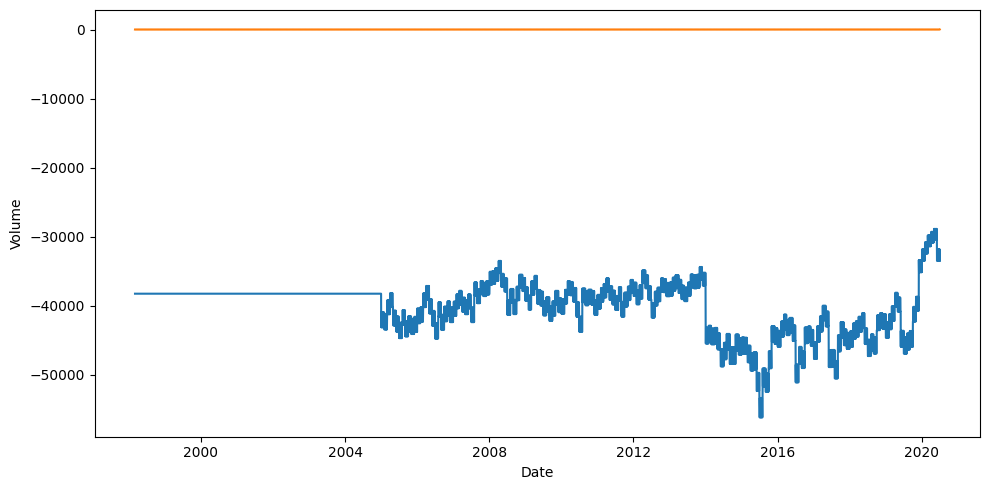

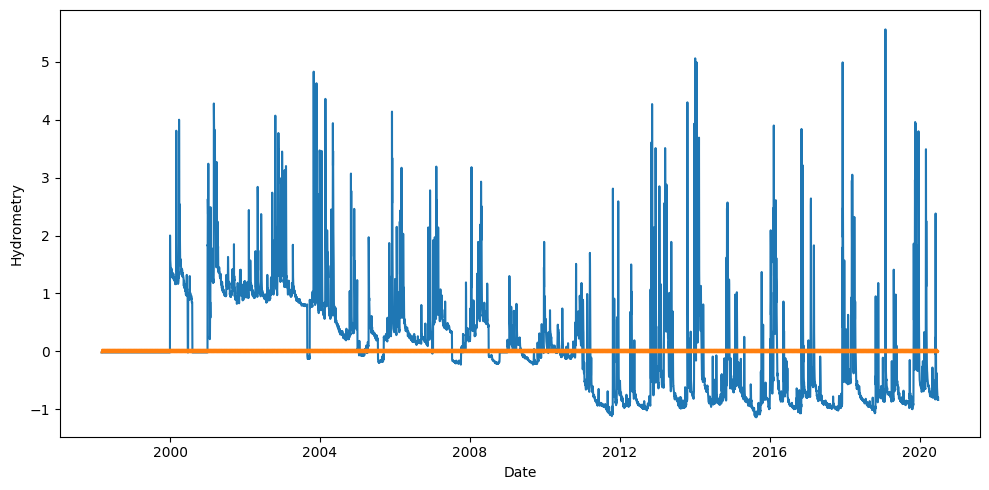

In [20]:
for column in new_columns:
    seasonal = decomposition_dict[f'decomposition_{column}'].seasonal

    fig, axis = plt.subplots(figsize = (10, 5))

    sns.lineplot(data = total_data[column])
    sns.lineplot(data = seasonal)

    plt.tight_layout()

    plt.show()  

### Dickey-Fuller test

Null Hypothesis (H0): the series is non-stationary

Alternative Hypothesis (H1): the series is stationary

In [21]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(total_data["Rainfall"])

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -8.978106e+00
p-value                        7.436511e-15
#Lags Used                     3.500000e+01
Number of Observations Used    8.118000e+03
Critical Value (1%)           -3.431156e+00
Critical Value (5%)           -2.861896e+00
Critical Value (10%)          -2.566960e+00
dtype: float64

In [22]:
test_stationarity(total_data["Rainfall"])

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -8.978106e+00
p-value                        7.436511e-15
#Lags Used                     3.500000e+01
Number of Observations Used    8.118000e+03
Critical Value (1%)           -3.431156e+00
Critical Value (5%)           -2.861896e+00
Critical Value (10%)          -2.566960e+00
dtype: float64

In [23]:
test_stationarity(total_data["Depth_to_Groundwater"])

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -5.990918e+00
p-value                        1.746519e-07
#Lags Used                     3.700000e+01
Number of Observations Used    8.116000e+03
Critical Value (1%)           -3.431156e+00
Critical Value (5%)           -2.861896e+00
Critical Value (10%)          -2.566960e+00
dtype: float64

In [24]:
test_stationarity(total_data["Temperature"])

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   -5.366471
p-value                           0.000004
#Lags Used                       28.000000
Number of Observations Used    8125.000000
Critical Value (1%)              -3.431155
Critical Value (5%)              -2.861896
Critical Value (10%)             -2.566959
dtype: float64

In [25]:
test_stationarity(total_data["Hydrometry"])

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   -5.207215
p-value                           0.000008
#Lags Used                       36.000000
Number of Observations Used    8117.000000
Critical Value (1%)              -3.431156
Critical Value (5%)              -2.861896
Critical Value (10%)             -2.566960
dtype: float64

Here we can see that the p-value is lower than 0.05 in all variables, indicating that we reject our null hypothesis. Therefore, based on this result, we consider this series as stationary

## Analysis of variability

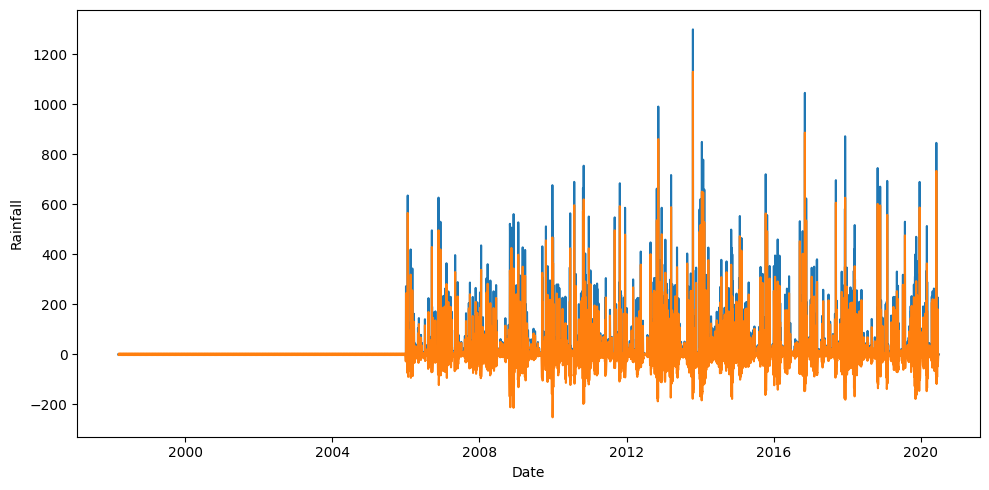

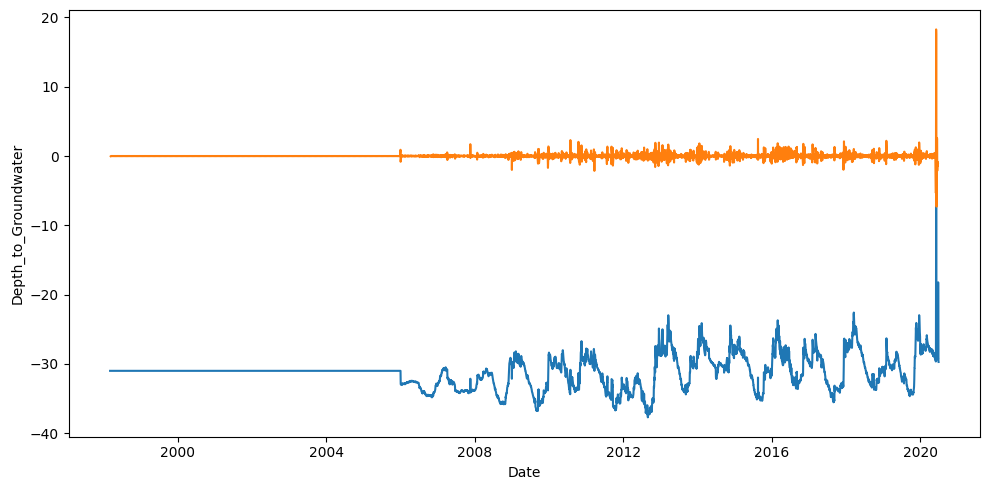

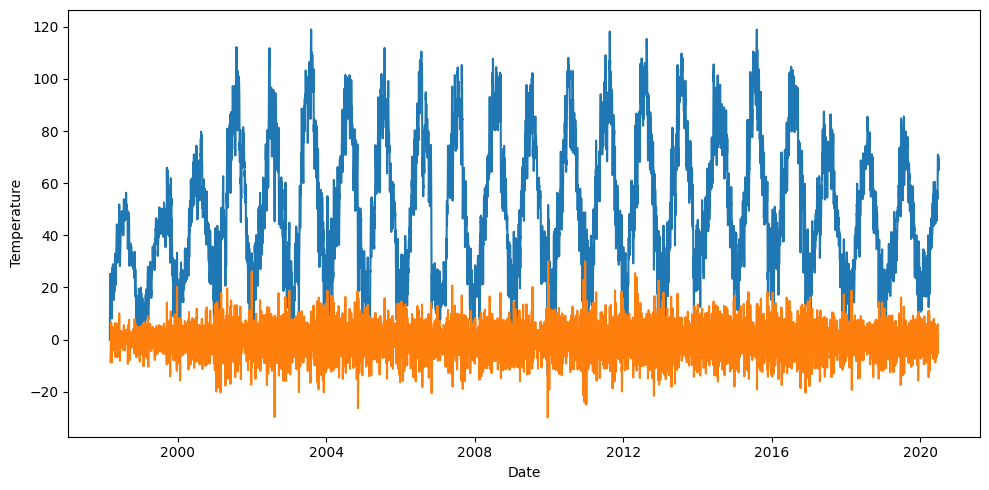

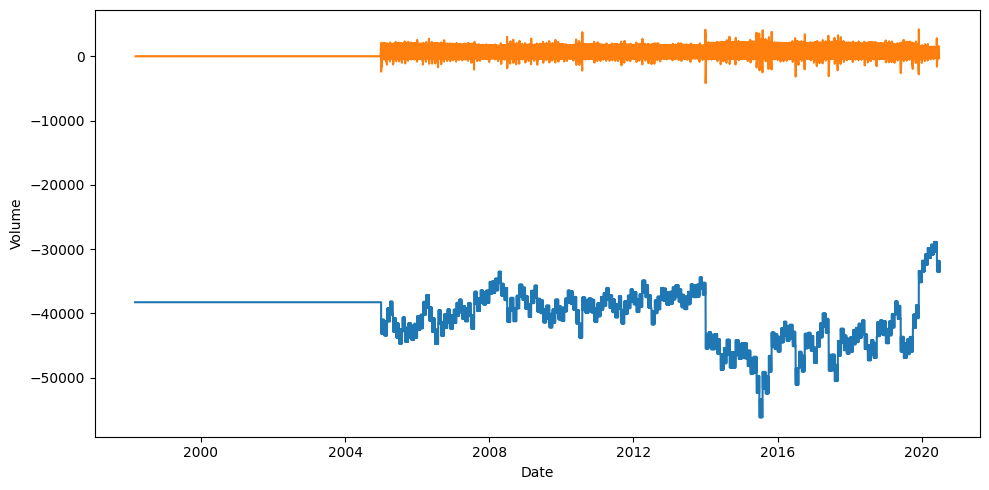

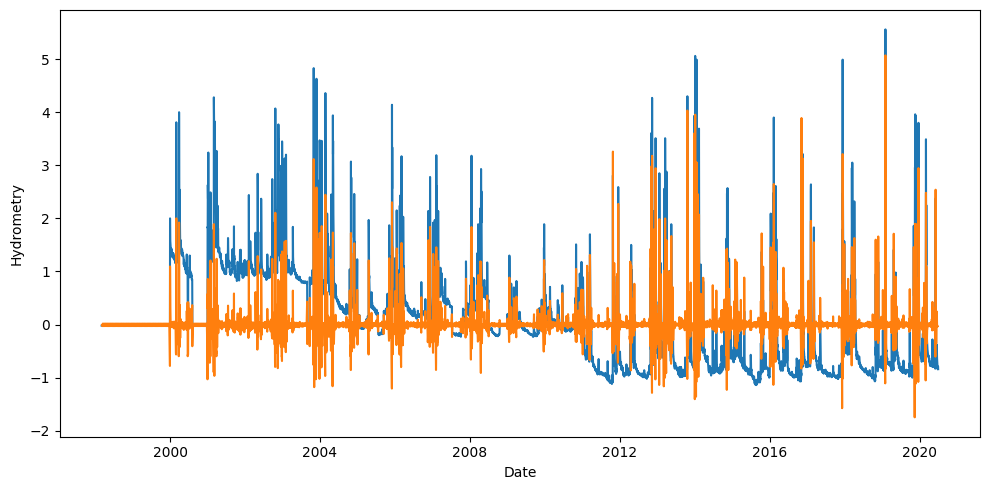

In [26]:
for column in new_columns:
    residual = decomposition_dict[f'decomposition_{column}'].resid

    fig, axis = plt.subplots(figsize = (10, 5))

    sns.lineplot(data = total_data[column])
    sns.lineplot(data = residual)

    plt.tight_layout()

    plt.show()  

### Autocorrelation analysis

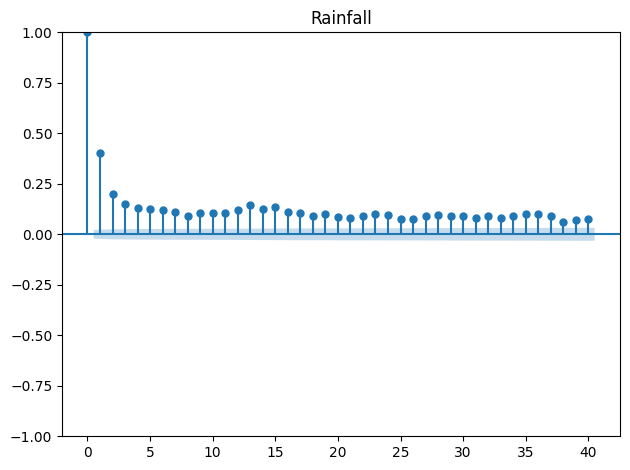

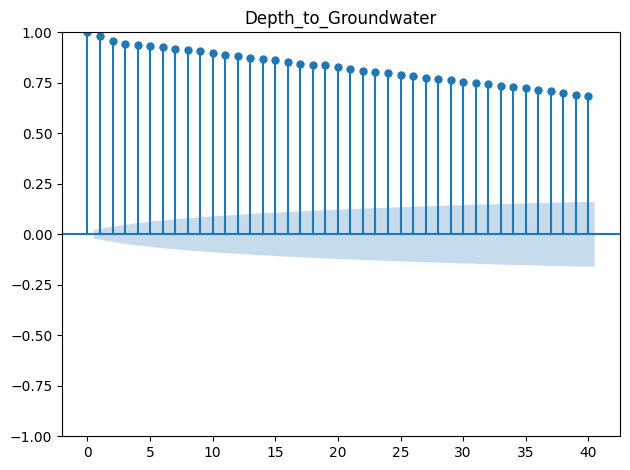

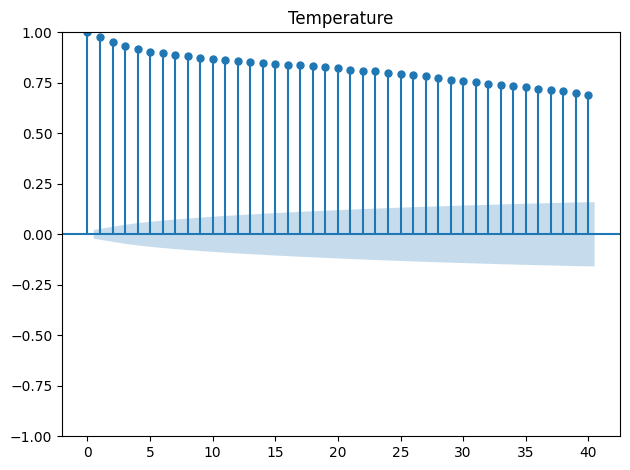

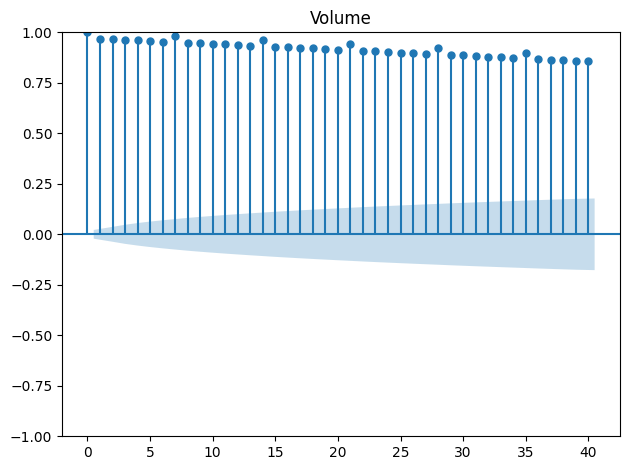

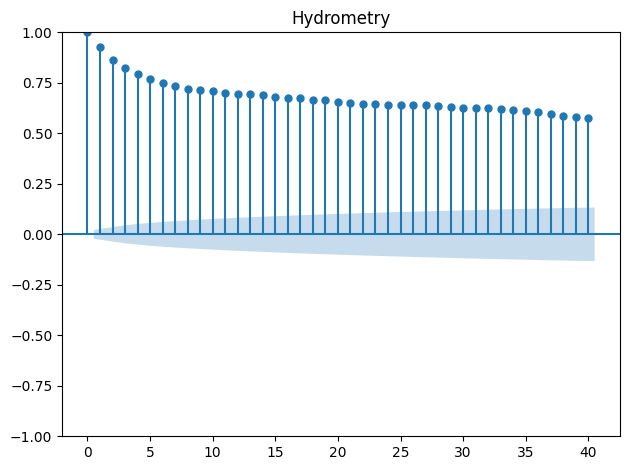

In [27]:
for column in new_columns:
    plot_acf(total_data[column])

    plt.tight_layout()
    plt.title(column)
    plt.show()

In [29]:
# Create model stationary

model = auto_arima(total_data["Depth_to_Groundwater"], seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=9729.584, Time=19.43 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10383.427, Time=0.40 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10371.266, Time=2.49 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=10366.677, Time=4.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10381.428, Time=0.13 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=9727.830, Time=14.15 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=9728.837, Time=4.75 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=9729.078, Time=36.62 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=9727.886, Time=13.46 sec


: 

In [ ]:
# Displaying model summary
model.summary()

In [ ]:
# Save model
dump(model, open("/workspaces/kaggle_proyect/models/Arima_model_stationary.pk", "wb"))

In [ ]:
# Predict 30 days of sales
forecast = model.predict(30)
forecast

In [ ]:
# Plot sales with prediction
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data["Depth_to_Groundwater"])
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()